In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime

In [2]:
file_path = "preprocessed_aqi_data.csv"
df = pd.read_csv(file_path, parse_dates=["time"])
df.set_index("time", inplace=True)
df.head()


,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,us_aqi,temperature_2m,relative_humidity_2m,wind_speed_10m,...,scaled_us_aqi_diff,scaled_pm2_5_diff,scaled_ozone_per_humidity,scaled_pm2_5_temp_interaction,scaled_log_pm2_5,scaled_log_pm10,scaled_log_carbon_monoxide,scaled_log_ozone,scaled_log_sulphur_dioxide,scaled_log_nitrogen_dioxide
time,,,,,,,,,,,,,,,,,,,,,
02/05/2025 00:00,27.4,17.4,297.0,13.1,8.3,63.0,58,28.5,75,13.1,...,-0.025673,-0.300030,-0.260302,-0.981880,-1.245303,-1.657725,0.569250,0.015070,-1.150756,0.418946
02/05/2025 01:00,25.8,16.1,228.0,9.4,7.2,68.0,58,28.2,77,13.9,...,-0.025673,-0.554864,-0.185319,-1.110763,-1.495094,-1.774391,-0.282986,0.191900,-1.564948,-0.099564
02/05/2025 02:00,24.5,15.1,179.0,6.7,6.4,71.0,58,28.1,78,13.5,...,-0.025673,-0.427447,-0.138175,-1.202193,-1.700522,-1.874431,-1.062071,0.291946,-1.902718,-0.611630
02/05/2025 03:00,23.7,14.4,160.0,5.4,6.0,72.0,58,27.9,79,13.7,...,-0.025673,-0.300030,-0.135960,-1.271589,-1.852061,-1.938561,-1.423041,0.324371,-2.085564,-0.926656
02/05/2025 04:00,23.1,14.1,161.0,4.9,5.8,71.0,58,27.8,79,13.5,...,-0.025673,-0.130140,-0.157835,-1.301687,-1.919127,-1.988037,-1.403004,0.291946,-2.180943,-1.065233


In [3]:
# Check shape and nulls
print(df.shape)
print(df.isnull().sum().sort_values(ascending=False))

# Summary stats
df.describe().T


(2112, 53)
pm10                             0
log_ozone                        0
log_nitrogen_dioxide             0
scaled_pm2_5                     0
scaled_pm10                      0
scaled_carbon_monoxide           0
scaled_ozone                     0
scaled_sulphur_dioxide           0
scaled_nitrogen_dioxide          0
scaled_temperature_2m            0
scaled_relative_humidity_2m      0
scaled_wind_speed_10m            0
scaled_us_aqi_lag1               0
scaled_us_aqi_lag6               0
scaled_us_aqi_lag24              0
scaled_us_aqi_roll3              0
scaled_us_aqi_diff               0
scaled_pm2_5_diff                0
scaled_ozone_per_humidity        0
scaled_pm2_5_temp_interaction    0
scaled_log_pm2_5                 0
scaled_log_pm10                  0
scaled_log_carbon_monoxide       0
scaled_log_ozone                 0
scaled_log_sulphur_dioxide       0
log_sulphur_dioxide              0
log_carbon_monoxide              0
pm2_5                            0
log_pm10 

,count,mean,std,min,25%,50%,75%,max
pm10,2112.0,7.144901e+01,40.874899,10.300000,48.300000,6.390000e+01,83.800000,385.600000
pm2_5,2112.0,2.621094e+01,8.162116,9.400000,20.900000,2.470000e+01,29.700000,73.600000
carbon_monoxide,2112.0,2.671690e+02,104.423991,115.000000,206.000000,2.495000e+02,303.000000,1100.000000
nitrogen_dioxide,2112.0,1.196671e+01,8.035381,2.400000,6.000000,9.800000e+00,16.100000,66.900000
sulphur_dioxide,2112.0,1.303570e+01,4.902230,5.000000,9.700000,1.230000e+01,15.100000,42.100000
ozone,2112.0,6.790672e+01,27.443052,12.000000,48.000000,6.150000e+01,84.000000,190.000000
us_aqi,2112.0,8.043892e+01,12.816752,56.000000,71.000000,7.900000e+01,88.000000,140.000000
temperature_2m,2112.0,3.028433e+01,1.821462,26.400000,28.900000,2.980000e+01,31.525000,38.300000
relative_humidity_2m,2112.0,7.557244e+01,10.767578,24.000000,68.000000,7.800000e+01,84.000000,98.000000
wind_speed_10m,2112.0,1.408059e+01,4.928324,0.700000,10.800000,1.420000e+01,17.000000,29.400000


In [4]:
features_to_plot = [
    'us_aqi',
    'scaled_pm2_5', 'scaled_pm10', 'scaled_carbon_monoxide', 'scaled_ozone',
    'scaled_sulphur_dioxide', 'scaled_nitrogen_dioxide',
    'scaled_temperature_2m', 'scaled_relative_humidity_2m', 'scaled_wind_speed_10m',
    'scaled_log_pm2_5', 'scaled_log_pm10', 'scaled_log_ozone',
    'scaled_log_carbon_monoxide', 'scaled_log_sulphur_dioxide', 'scaled_log_nitrogen_dioxide',
    'hour_sin', 'hour_cos',
    'scaled_us_aqi_lag1', 'scaled_us_aqi_lag6', 'scaled_us_aqi_lag24',
    'scaled_us_aqi_roll3', 'scaled_us_aqi_diff',
    'scaled_pm2_5_diff',
    'scaled_ozone_per_humidity', 'scaled_pm2_5_temp_interaction'
]


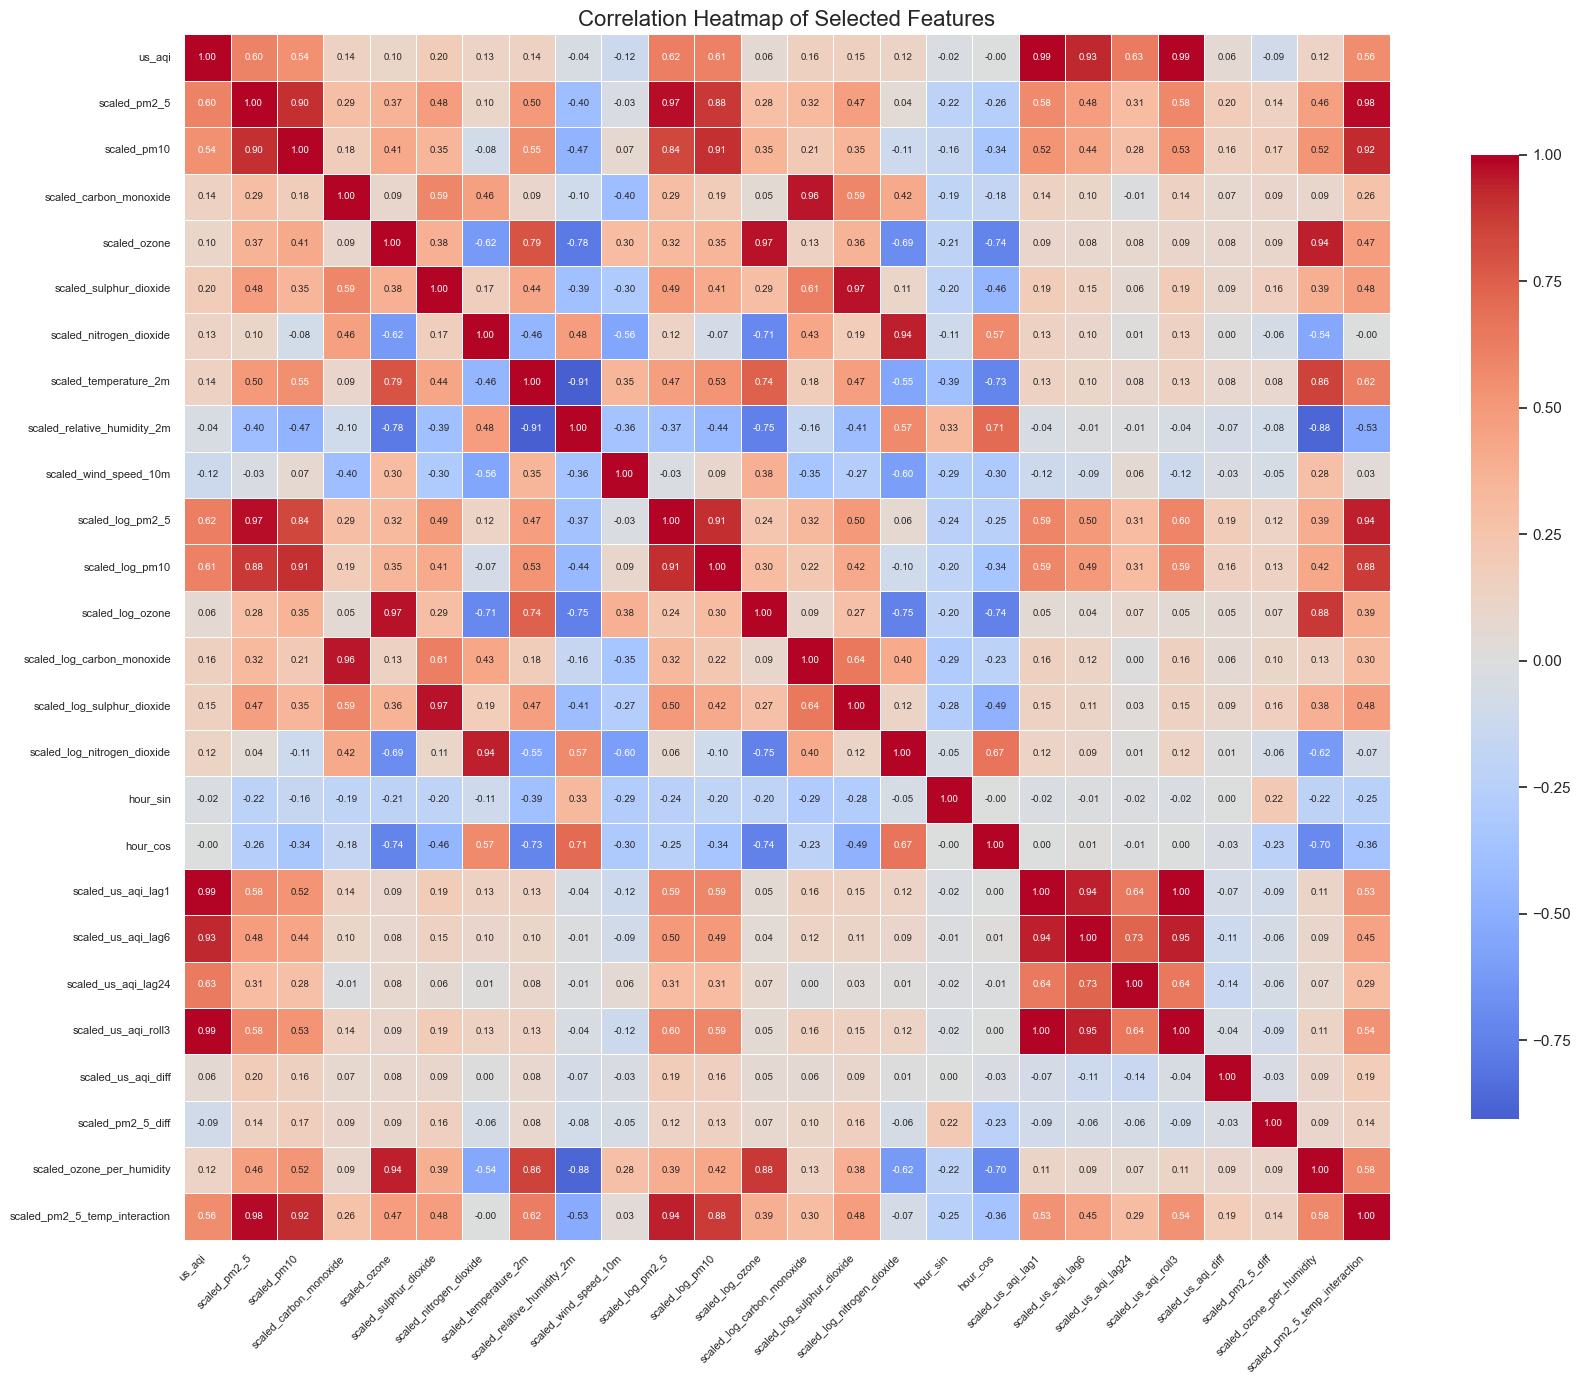

In [5]:
# --- STEP 2: Create correlation matrix ---
corr_matrix = df[features_to_plot].corr()

# --- STEP 3: Plot heatmap ---
plt.figure(figsize=(18, 14))
sns.set(style="white")
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 7}
)
plt.title("Correlation Heatmap of Selected Features", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

## Correlation Heatmap Feature Selection Strategy

To avoid redundancy and maintain interpretability, we selected the most informative and transformed versions of features for correlation analysis.

### Features **included** in the heatmap:
- Scaled pollutant concentrations (e.g., `scaled_pm2_5`, `scaled_ozone`)
- Scaled meteorological variables (e.g., `scaled_temperature_2m`)
- Log-transformed + scaled pollutants (e.g., `scaled_log_pm2_5`)
- Time-encoded variables (`hour_sin`, `hour_cos`)
- Lag, rolling, and diff features (`scaled_us_aqi_lag1`, `scaled_us_aqi_diff`)
- Domain-informed interaction terms (`scaled_ozone_per_humidity`)

### Features **excluded**:
- Raw pollutant readings (e.g., `ozone`, `pm2_5`)
- Raw log values (e.g., `log_pm2_5`)
- Redundant unscaled inputs (`temperature_2m`, `wind_speed_10m`)

This results in a cleaner, more focused heatmap that helps identify key predictors of `us_aqi`.


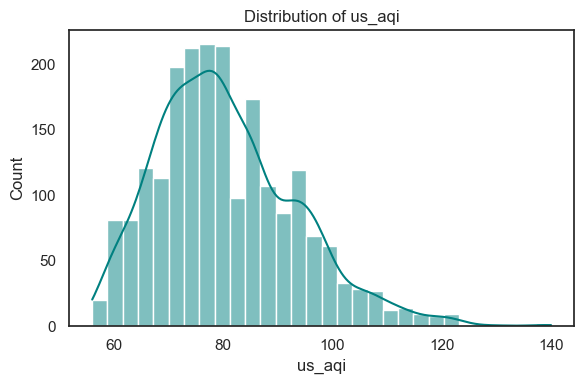

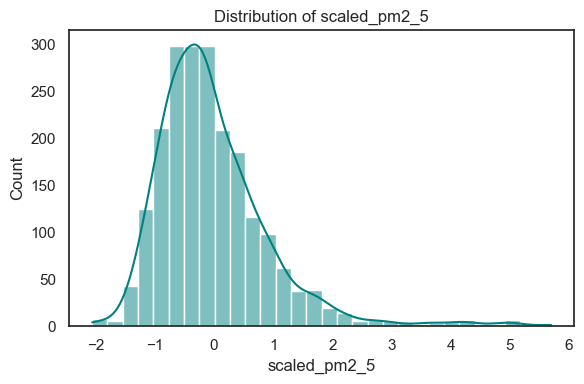

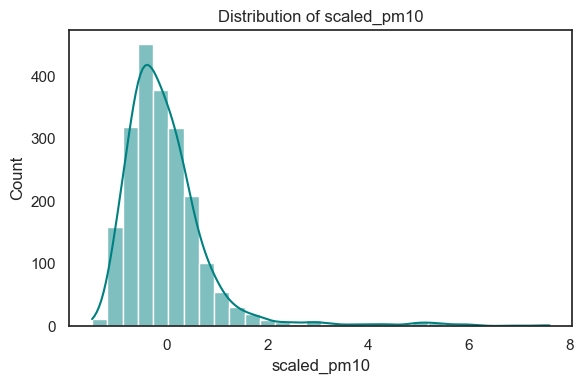

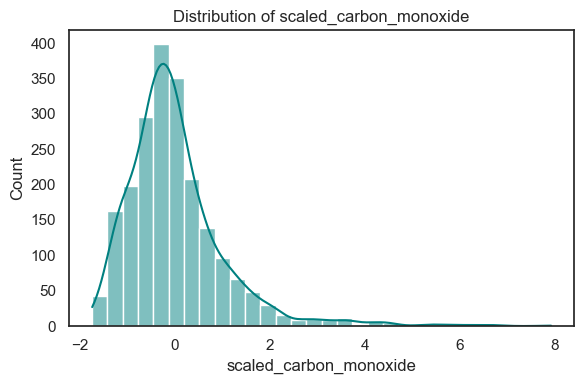

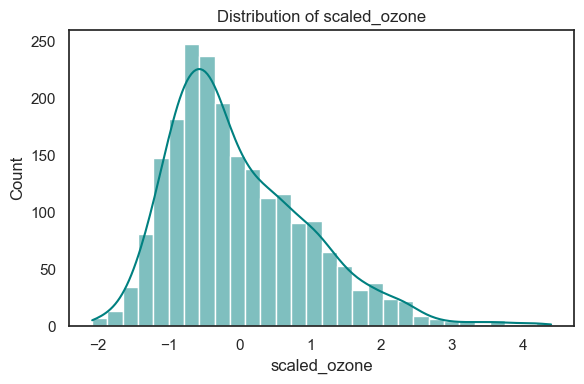

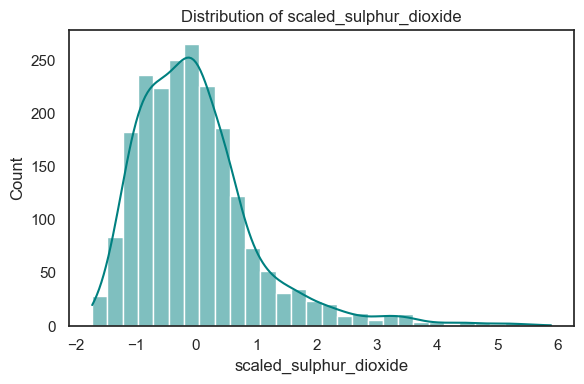

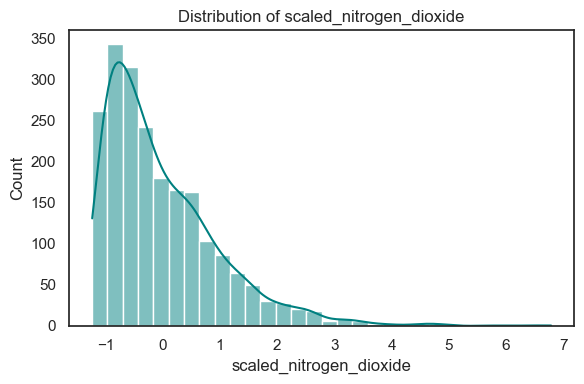

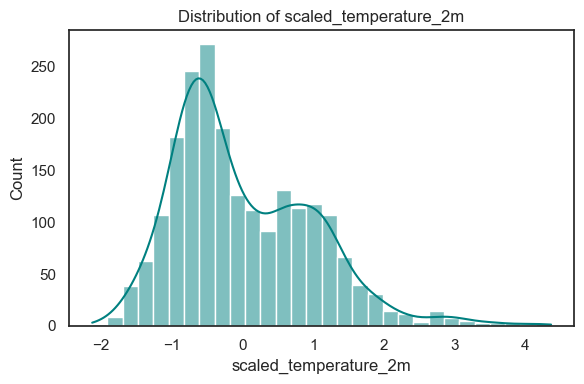

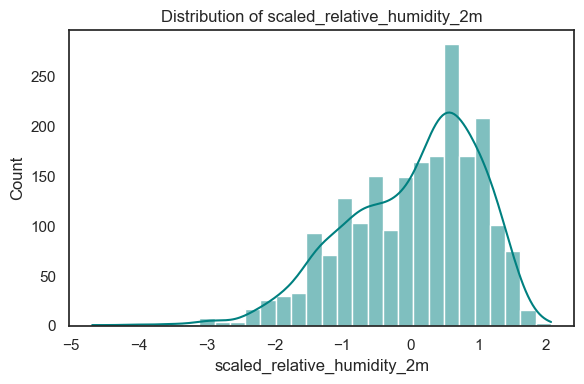

In [6]:
features = [
    'us_aqi', 'scaled_pm2_5', 'scaled_pm10', 'scaled_carbon_monoxide',
    'scaled_ozone', 'scaled_sulphur_dioxide', 'scaled_nitrogen_dioxide',
    'scaled_temperature_2m', 'scaled_relative_humidity_2m'
]

# Plot each distribution
for col in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='teal')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


## Exploratory Data Analysis Summary

### 1. Missing Values
- All features have 0 missing values — No imputation needed.

### 2. Feature Distributions
- Most air pollutant features (e.g., PM2.5, Ozone, CO, NO2) were skewed.
- Log scaling and standard scaling corrected their distributions.
- Final selected versions: `scaled_log_pm2_5`, `scaled_log_ozone`, etc.

### 3. Correlation Analysis
- Strong correlation observed:
  - `PM2.5` ↔ `US AQI`
  - `Ozone` ↔ `Temperature`
  - AQI lags highly correlated → risk of redundancy

### 4. Multicollinearity (VIF)
- Features with VIF > 10 indicate strong multicollinearity.
- Retained only one representation of each pollutant or AQI lag.

### 5. Feature Pruning (Before Modeling)
- Dropped redundant features:
  - Multiple log/scaled/raw versions of pollutants
  - Highly correlated AQI lag features
- Final features selected based on VIF, correlation, and interpretability.

Next, we proceed to model training and apply SHAP for explainability.


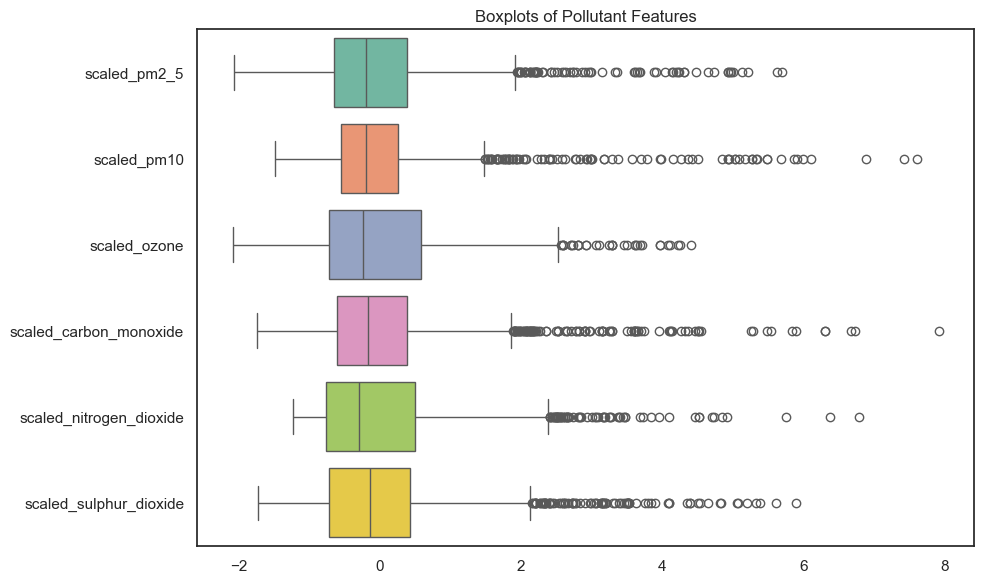

In [7]:
# Pick key pollutant features
pollutants = [
    'scaled_pm2_5', 'scaled_pm10', 'scaled_ozone',
    'scaled_carbon_monoxide', 'scaled_nitrogen_dioxide', 'scaled_sulphur_dioxide'
]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[pollutants], orient='h', palette='Set2')
plt.title('Boxplots of Pollutant Features')
plt.tight_layout()
plt.show()


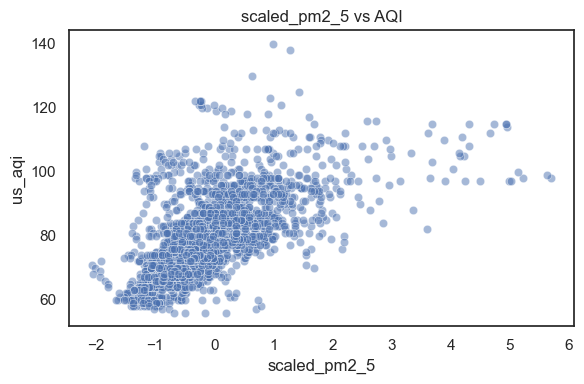

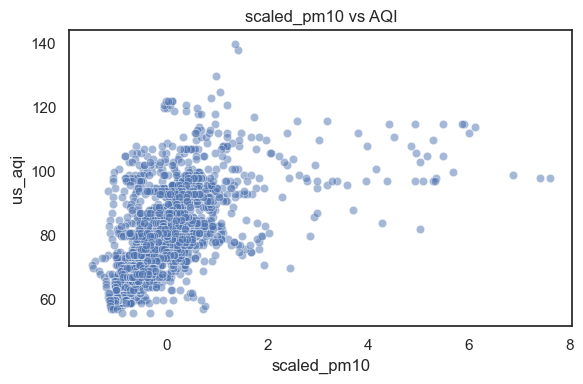

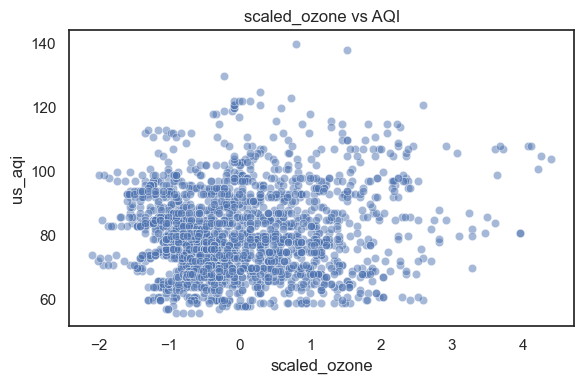

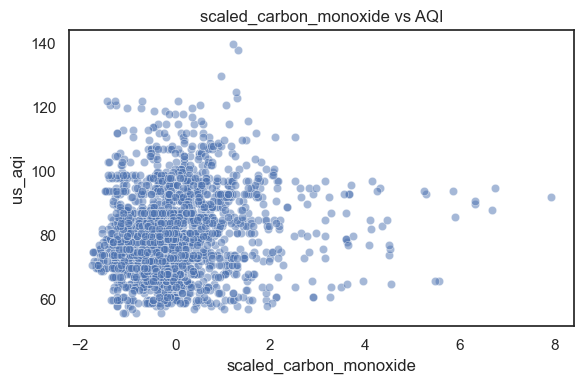

In [8]:
top_corr_features = [
    'scaled_pm2_5', 'scaled_pm10', 'scaled_ozone', 'scaled_carbon_monoxide'
]

for feat in top_corr_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feat], y=df['us_aqi'], alpha=0.5)
    plt.title(f'{feat} vs AQI')
    plt.xlabel(feat)
    plt.ylabel('us_aqi')
    plt.tight_layout()
    plt.show()


In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select numeric features only (exclude target and redundant encodings if any)
features_for_vif = [
    'scaled_pm2_5', 'scaled_pm10', 'scaled_carbon_monoxide', 'scaled_ozone',
    'scaled_sulphur_dioxide', 'scaled_nitrogen_dioxide',
    'scaled_temperature_2m', 'scaled_relative_humidity_2m',
    'scaled_wind_speed_10m', 'scaled_us_aqi_lag1', 'scaled_us_aqi_lag6',
    'scaled_us_aqi_lag24', 'scaled_us_aqi_roll3'
]

# VIF requires no missing values
X = df[features_for_vif].dropna()

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display
print(vif_data.sort_values(by='VIF', ascending=False))


                        Feature         VIF
12          scaled_us_aqi_roll3  581.838560
9            scaled_us_aqi_lag1  534.726951
10           scaled_us_aqi_lag6   13.614701
0                  scaled_pm2_5    9.013654
1                   scaled_pm10    7.341653
6         scaled_temperature_2m    7.322745
7   scaled_relative_humidity_2m    6.363202
3                  scaled_ozone    4.709008
5       scaled_nitrogen_dioxide    4.155800
4        scaled_sulphur_dioxide    2.529760
11          scaled_us_aqi_lag24    2.289331
2        scaled_carbon_monoxide    2.141208
8         scaled_wind_speed_10m    1.901229


In [13]:
# Make a copy before dropping
df_selected = df.copy()

# --- Feature Dropping Based on Multicollinearity (VIF Analysis) ---

# Reason: Extremely high VIF (581.83), indicating it is almost perfectly collinear
# with lag-based AQI features. Redundant.
df_selected.drop(columns=['scaled_us_aqi_roll3'], inplace=True)

# Reason: Very high VIF (534.72), but we choose to KEEP this and drop 'roll3' instead
# because lag features are generally easier to interpret in time-series models.

# Optional Drop:
# 'scaled_us_aqi_lag6' has VIF = 13.61 → borderline multicollinear.
# If you want to reduce complexity and the feature doesn't rank highly in importance,
# you can uncomment the next line to drop it as well.
df_selected.drop(columns=['scaled_us_aqi_lag6'], inplace=True)

print("Features dropped due to multicollinearity.")
print("Remaining features:", df_selected.shape[1])


Features dropped due to multicollinearity.
Remaining features: 51


In [14]:
# Define redundant features (with>0.95 correlation) to drop based on correlation analysis
# These 'log' features are highly correlated with their already scaled counterparts.
# Keeping both can cause redundancy and may confuse model interpretation.
redundant_logs = [
    'scaled_log_pm2_5',
    'scaled_log_pm10',
    'scaled_log_ozone',
    'scaled_log_carbon_monoxide',
    'scaled_log_sulphur_dioxide',
    'scaled_log_nitrogen_dioxide'
]

#Drop these features from the dataset
df_selected.drop(columns=redundant_logs, inplace=True)

# print summary
print("Dropped redundant log-transformed features due to high correlation with scaled versions:")
for feature in redundant_logs:
    print(f"{feature} (kept its original: {feature.replace('log_', '')})")

# Optional: print resulting feature count
print(f"\nRemaining features: {df_selected.shape[1]}")

Dropped redundant log-transformed features due to high correlation with scaled versions:
scaled_log_pm2_5 (kept its original: scaled_pm2_5)
scaled_log_pm10 (kept its original: scaled_pm10)
scaled_log_ozone (kept its original: scaled_ozone)
scaled_log_carbon_monoxide (kept its original: scaled_carbon_monoxide)
scaled_log_sulphur_dioxide (kept its original: scaled_sulphur_dioxide)
scaled_log_nitrogen_dioxide (kept its original: scaled_nitrogen_dioxide)

Remaining features: 45


In [19]:
# Cap outliers at 99th percentile
for col in ['scaled_pm2_5', 'scaled_pm10', 'scaled_carbon_monoxide',
            'scaled_ozone', 'scaled_sulphur_dioxide', 'scaled_nitrogen_dioxide']:
    upper_limit = df_selected[col].quantile(0.99)
    df_selected[col] = np.where(df_selected[col] > upper_limit, upper_limit, df_selected[col])
    


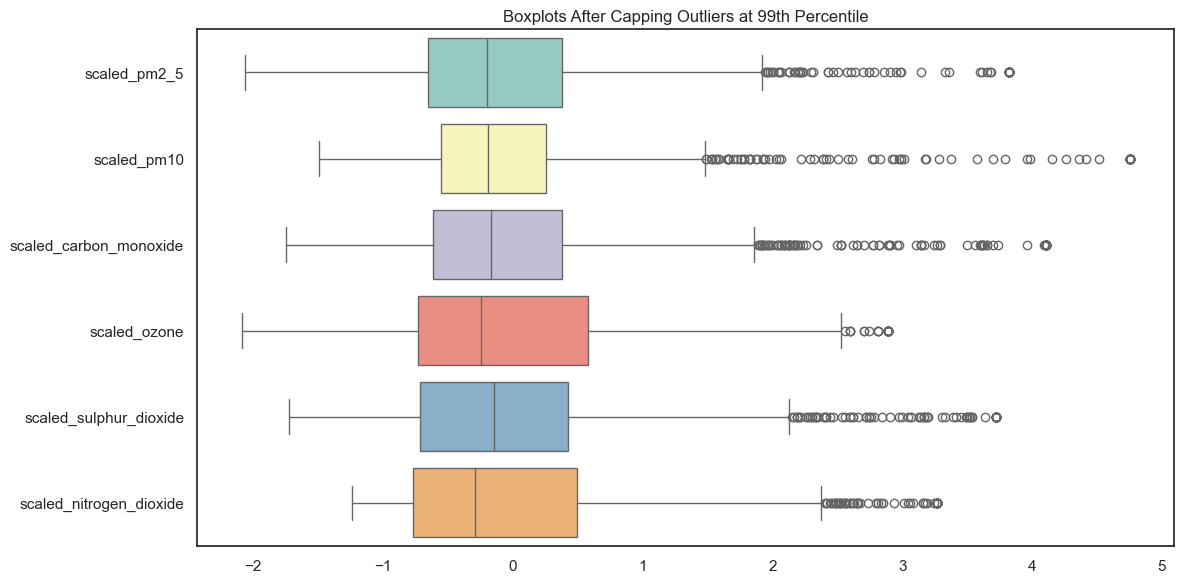

In [20]:
capped_features = [
    'scaled_pm2_5', 'scaled_pm10', 'scaled_carbon_monoxide',
    'scaled_ozone', 'scaled_sulphur_dioxide', 'scaled_nitrogen_dioxide'
]

# Plot updated boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_selected[capped_features], orient='h', palette='Set3')
plt.title("Boxplots After Capping Outliers at 99th Percentile")
plt.tight_layout()
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

X = df_selected.drop(columns=['us_aqi'])  # target column
y = df_selected['us_aqi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Train XGBoost
model = XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")


MAE: 0.26
RMSE: 0.58


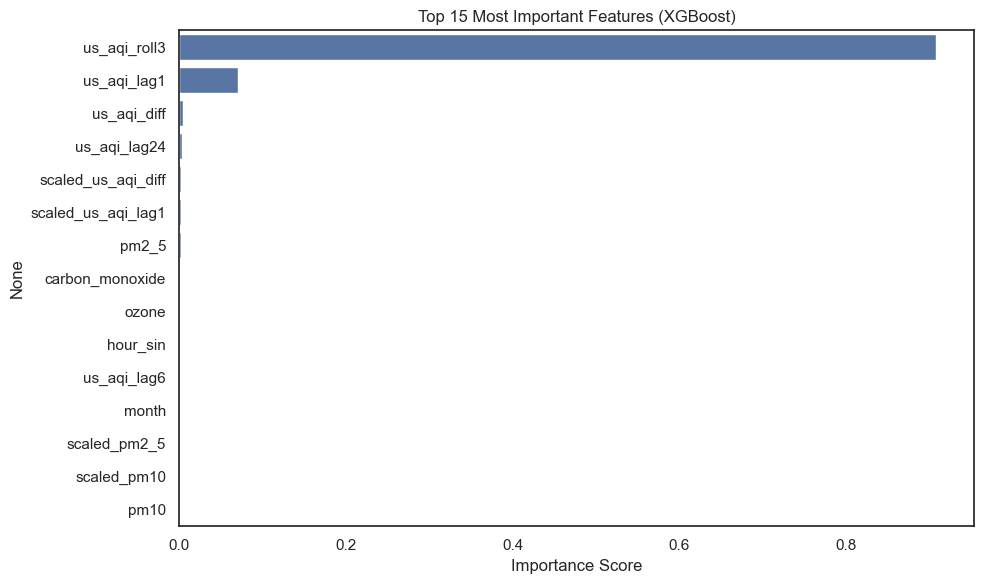

In [23]:
import pandas as pd
import seaborn as sns

# Get importance scores
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 15 Most Important Features (XGBoost)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [24]:
# Drop 'us_aqi_roll3' from your selected feature set
df_selected.drop(columns=['us_aqi_roll3'], inplace=True, errors='ignore')

print("Dropped 'us_aqi_roll3' to ensure consistency across all model types.")


Dropped 'us_aqi_roll3' to ensure consistency across all model types.


✅ MAE: 0.182
✅ RMSE: 0.822


C:\Users\USER\AppData\Local\Temp\ipykernel_16268\4280352952.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


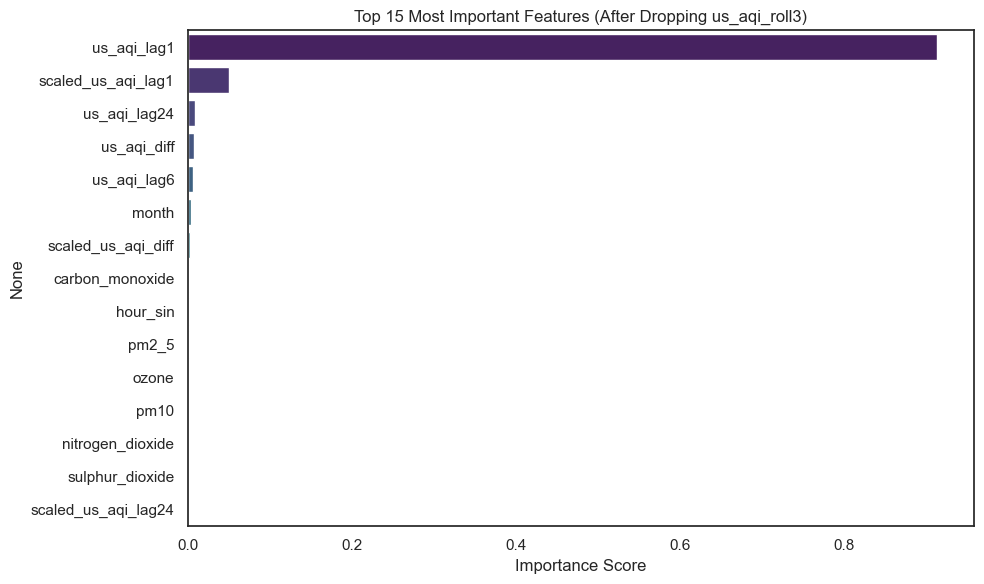


🔝 Top 15 Features:

us_aqi_lag1            0.912957
scaled_us_aqi_lag1     0.049978
us_aqi_lag24           0.008387
us_aqi_diff            0.007464
us_aqi_lag6            0.006197
month                  0.004470
scaled_us_aqi_diff     0.003108
carbon_monoxide        0.001706
hour_sin               0.001638
pm2_5                  0.001095
ozone                  0.000706
pm10                   0.000483
nitrogen_dioxide       0.000362
sulphur_dioxide        0.000312
scaled_us_aqi_lag24    0.000167
dtype: float32


In [27]:
# Split data
X = df_selected.drop(columns=['us_aqi'])
y = df_selected['us_aqi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train XGBoost model
model = XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = model.predict(X_test)
print(f"✅ MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"✅ RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")

# Get top 15 feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title("Top 15 Most Important Features (After Dropping us_aqi_roll3)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# Also print them
print("\n🔝 Top 15 Features:\n")
print(top_features)


In [29]:
df_selected.drop(columns=[
    'scaled_us_aqi_lag1',
    'scaled_us_aqi_lag6',
    'scaled_us_aqi_lag24',
    'scaled_us_aqi_diff'
], inplace=True, errors='ignore')


✅ MAE: 0.180
✅ RMSE: 0.853


C:\Users\USER\AppData\Local\Temp\ipykernel_16268\1116148720.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='magma')


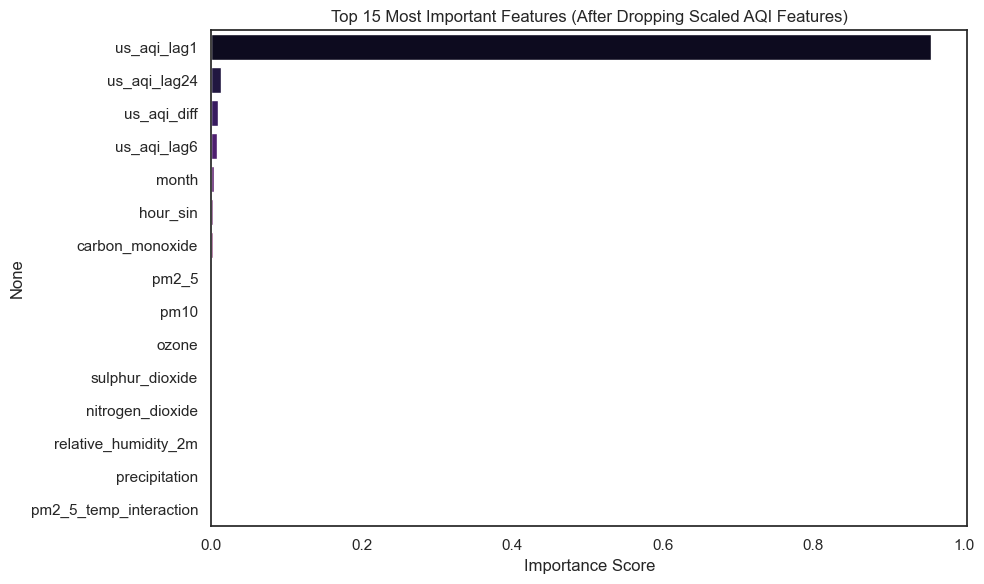


🔝 Top 15 Features:

us_aqi_lag1               0.957472
us_aqi_lag24              0.013577
us_aqi_diff               0.009299
us_aqi_lag6               0.007198
month                     0.003304
hour_sin                  0.002321
carbon_monoxide           0.002293
pm2_5                     0.001494
pm10                      0.000985
ozone                     0.000555
sulphur_dioxide           0.000449
nitrogen_dioxide          0.000290
relative_humidity_2m      0.000077
precipitation             0.000070
pm2_5_temp_interaction    0.000070
dtype: float32


In [30]:
X = df_selected.drop(columns=['us_aqi'])  # Target is 'us_aqi'
y = df_selected['us_aqi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 3: Train XGBoost
model = XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# ✅ Step 4: Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"✅ MAE: {mae:.3f}")
print(f"✅ RMSE: {rmse:.3f}")

# ✅ Step 5: Feature importance plot
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='magma')
plt.title("Top 15 Most Important Features (After Dropping Scaled AQI Features)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# Also print the top features
print("\n🔝 Top 15 Features:\n")
print(top_features)

🌲 RF MAE: 0.258
🌲 RF RMSE: 0.962


C:\Users\USER\AppData\Local\Temp\ipykernel_16268\227846104.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_top15.values, y=rf_top15.index, palette='coolwarm')


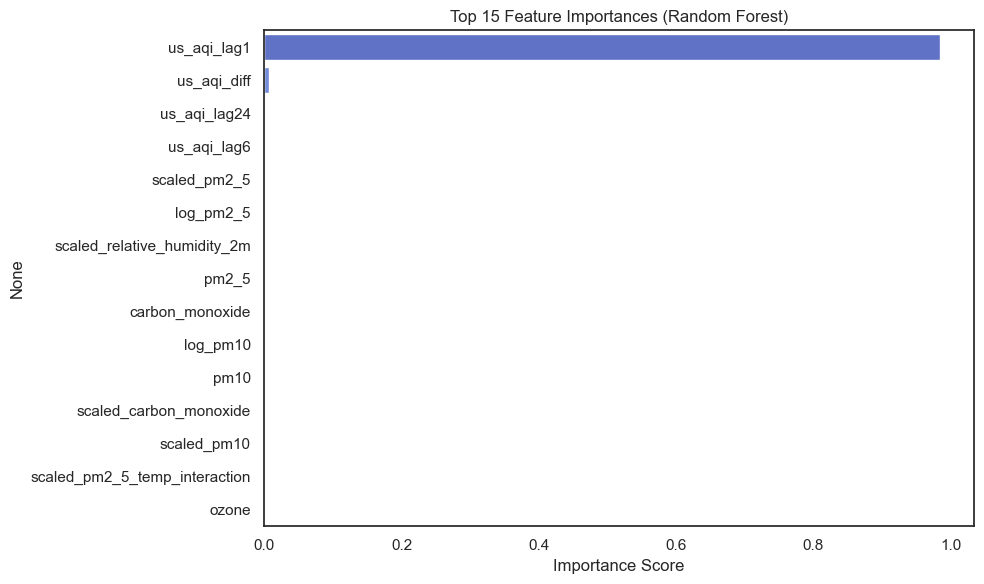


🔝 Top 15 Features from Random Forest:

us_aqi_lag1                      0.984587
us_aqi_diff                      0.007390
us_aqi_lag24                     0.001693
us_aqi_lag6                      0.001220
scaled_pm2_5                     0.000379
log_pm2_5                        0.000313
scaled_relative_humidity_2m      0.000267
pm2_5                            0.000266
carbon_monoxide                  0.000254
log_pm10                         0.000252
pm10                             0.000225
scaled_carbon_monoxide           0.000187
scaled_pm10                      0.000180
scaled_pm2_5_temp_interaction    0.000161
ozone                            0.000158
dtype: float64


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# ✅ Step 1: Prepare data
X = df_selected.drop(columns=['us_aqi'])  # target
y = df_selected['us_aqi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 2: Train Random Forest
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# ✅ Step 3: Evaluate
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"🌲 RF MAE: {mae_rf:.3f}")
print(f"🌲 RF RMSE: {rmse_rf:.3f}")

# ✅ Step 4: Feature Importances
rf_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
rf_top15 = rf_importances.sort_values(ascending=False).head(15)

# ✅ Step 5: Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_top15.values, y=rf_top15.index, palette='coolwarm')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# Optional: print values
print("\n🔝 Top 15 Features from Random Forest:\n")
print(rf_top15)


In [32]:
redundant_pollutants = [
    'pm2_5', 'log_pm2_5',
    'pm10', 'log_pm10', 'scaled_pm10',
    'carbon_monoxide', 'scaled_carbon_monoxide',
]

df_selected.drop(columns=redundant_pollutants, inplace=True, errors='ignore')
print("✅ Dropped redundant pollutant features to simplify interpretation.")


✅ Dropped redundant pollutant features to simplify interpretation.


In [34]:
pip install optuna


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# ✅ Split data
X = df_selected.drop(columns=["us_aqi"])
y = df_selected["us_aqi"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Objective function for Random Forest
def objective_rf(trial):
    model = RandomForestRegressor(
        n_estimators=trial.suggest_int("n_estimators", 100, 500),
        max_depth=trial.suggest_int("max_depth", 5, 25),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10),
        min_samples_leaf=trial.suggest_int("min_samples_leaf", 1, 5),
        max_features=trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        bootstrap=trial.suggest_categorical("bootstrap", [True, False]),
        random_state=42
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)

# ✅ Objective function for XGBoost
def objective_xgb(trial):
    model = XGBRegressor(
        n_estimators=trial.suggest_int("n_estimators", 100, 500),
        max_depth=trial.suggest_int("max_depth", 3, 15),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.3),
        subsample=trial.suggest_float("subsample", 0.5, 1.0),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.5, 1.0),
        gamma=trial.suggest_float("gamma", 0, 5),
        reg_alpha=trial.suggest_float("reg_alpha", 0.0, 1.0),
        reg_lambda=trial.suggest_float("reg_lambda", 0.0, 1.0),
        random_state=42,
        verbosity=0
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)

# ✅ Run Optuna
print("Running Optuna for Random Forest...")
study_rf = optuna.create_study(direction="minimize")
study_rf.optimize(objective_rf, n_trials=30)

print("\n Running Optuna for XGBoost...")
study_xgb = optuna.create_study(direction="minimize")
study_xgb.optimize(objective_xgb, n_trials=30)

# ✅ Print best hyperparameters
print("\n Best RF Params:", study_rf.best_params)
print(" Best RF MAE:", study_rf.best_value)

print("\n Best XGB Params:", study_xgb.best_params)
print(" Best XGB MAE:", study_xgb.best_value)


[I 2025-08-01 00:54:23,322] A new study created in memory with name: no-name-b86c1364-0489-4587-8517-810d10aa66c1


Running Optuna for Random Forest...


[I 2025-08-01 00:54:26,066] Trial 0 finished with value: 1.8197631821064633 and parameters: {'n_estimators': 191, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 1.8197631821064633.
[I 2025-08-01 00:54:29,071] Trial 1 finished with value: 1.2066256561638777 and parameters: {'n_estimators': 450, 'max_depth': 24, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 1.2066256561638777.
[I 2025-08-01 00:54:39,810] Trial 2 finished with value: 0.24556164580918452 and parameters: {'n_estimators': 361, 'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}. Best is trial 2 with value: 0.24556164580918452.
[I 2025-08-01 00:54:41,355] Trial 3 finished with value: 1.472646834824827 and parameters: {'n_estimators': 321, 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_feature


 Running Optuna for XGBoost...


[I 2025-08-01 00:58:22,059] Trial 0 finished with value: 1.6749305995643562 and parameters: {'n_estimators': 228, 'max_depth': 11, 'learning_rate': 0.2402474066802697, 'subsample': 0.8471045770612163, 'colsample_bytree': 0.5118915186406789, 'gamma': 3.7668817576936684, 'reg_alpha': 0.2144301110360436, 'reg_lambda': 0.6509918312018912}. Best is trial 0 with value: 1.6749305995643562.
[I 2025-08-01 00:58:22,625] Trial 1 finished with value: 0.7584690247303487 and parameters: {'n_estimators': 457, 'max_depth': 6, 'learning_rate': 0.2459475555763107, 'subsample': 0.685827334038487, 'colsample_bytree': 0.6595435516705614, 'gamma': 1.462631444773843, 'reg_alpha': 0.38148541158102434, 'reg_lambda': 0.5822997757332743}. Best is trial 1 with value: 0.7584690247303487.
[I 2025-08-01 00:58:23,040] Trial 2 finished with value: 0.5089768574311097 and parameters: {'n_estimators': 182, 'max_depth': 15, 'learning_rate': 0.19580796800323594, 'subsample': 0.5893838366269573, 'colsample_bytree': 0.821250


 Best RF Params: {'n_estimators': 500, 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}
 Best RF MAE: 0.2429866036249015

 Best XGB Params: {'n_estimators': 354, 'max_depth': 12, 'learning_rate': 0.019155025547408437, 'subsample': 0.5375786540346374, 'colsample_bytree': 0.9738922559884143, 'gamma': 1.4440257120041338, 'reg_alpha': 0.042922047832131605, 'reg_lambda': 0.9925137616719123}
 Best XGB MAE: 0.19740244006434232


C:\Users\USER\AppData\Local\Temp\ipykernel_16268\1019847673.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importance.values, y=rf_importance.index, palette="Blues_r")
C:\Users\USER\AppData\Local\Temp\ipykernel_16268\1019847673.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_importance.values, y=xgb_importance.index, palette="Purples_r")


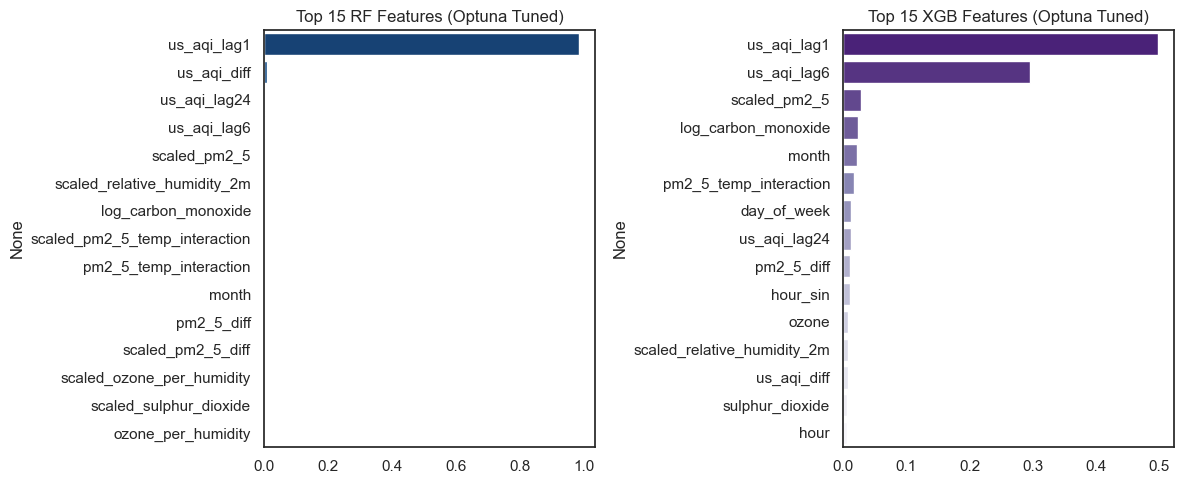


🌲 Random Forest (Best MAE): 0.243
📦 XGBoost (Best MAE): 0.197


In [37]:
# Best Random Forest
best_rf_params = study_rf.best_params
best_rf = RandomForestRegressor(**best_rf_params, random_state=42)
best_rf.fit(X_train, y_train)
rf_importance = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)

# Best XGBoost
best_xgb_params = study_xgb.best_params
best_xgb = XGBRegressor(**best_xgb_params, random_state=42)
best_xgb.fit(X_train, y_train)
xgb_importance = pd.Series(best_xgb.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=rf_importance.values, y=rf_importance.index, palette="Blues_r")
plt.title("Top 15 RF Features (Optuna Tuned)")

plt.subplot(1, 2, 2)
sns.barplot(x=xgb_importance.values, y=xgb_importance.index, palette="Purples_r")
plt.title("Top 15 XGB Features (Optuna Tuned)")

plt.tight_layout()
plt.show()

# ✅ Print Scores
from sklearn.metrics import mean_squared_error

print(f"\nRandom Forest (Best MAE): {mean_absolute_error(y_test, best_rf.predict(X_test)):.3f}")
print(f" XGBoost (Best MAE): {mean_absolute_error(y_test, best_xgb.predict(X_test)):.3f}")


In [45]:
df.head()

,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,us_aqi,temperature_2m,relative_humidity_2m,wind_speed_10m,...,scaled_us_aqi_diff,scaled_pm2_5_diff,scaled_ozone_per_humidity,scaled_pm2_5_temp_interaction,scaled_log_pm2_5,scaled_log_pm10,scaled_log_carbon_monoxide,scaled_log_ozone,scaled_log_sulphur_dioxide,scaled_log_nitrogen_dioxide
time,,,,,,,,,,,,,,,,,,,,,
02/05/2025 00:00,27.4,17.4,297.0,13.1,8.3,63.0,58,28.5,75,13.1,...,-0.025673,-0.300030,-0.260302,-0.981880,-1.245303,-1.657725,0.569250,0.015070,-1.150756,0.418946
02/05/2025 01:00,25.8,16.1,228.0,9.4,7.2,68.0,58,28.2,77,13.9,...,-0.025673,-0.554864,-0.185319,-1.110763,-1.495094,-1.774391,-0.282986,0.191900,-1.564948,-0.099564
02/05/2025 02:00,24.5,15.1,179.0,6.7,6.4,71.0,58,28.1,78,13.5,...,-0.025673,-0.427447,-0.138175,-1.202193,-1.700522,-1.874431,-1.062071,0.291946,-1.902718,-0.611630
02/05/2025 03:00,23.7,14.4,160.0,5.4,6.0,72.0,58,27.9,79,13.7,...,-0.025673,-0.300030,-0.135960,-1.271589,-1.852061,-1.938561,-1.423041,0.324371,-2.085564,-0.926656
02/05/2025 04:00,23.1,14.1,161.0,4.9,5.8,71.0,58,27.8,79,13.5,...,-0.025673,-0.130140,-0.157835,-1.301687,-1.919127,-1.988037,-1.403004,0.291946,-2.180943,-1.065233


In [49]:
# Reset index so 'time' becomes a column
df_reset = df.reset_index()                # df must have time as index before this
df_selected_reset = df_selected.reset_index(drop=True)

# Add time column as datetime
df_selected_reset["datetime"] = df_reset["time"].iloc[df_selected_reset.index].values

# Optional: move datetime to first column
cols = ["datetime"] + [col for col in df_selected_reset.columns if col != "datetime"]
df_selected_reset = df_selected_reset[cols]

# Save to CSV
df_selected_reset.to_csv("selected_features_for_modeling.csv", index=False)
print("✅ Selected features with datetime saved successfully.")


✅ Selected features with datetime saved successfully.


In [50]:
import pandas as pd

df_raw = pd.read_csv("selected_features_for_modeling.csv")
print(df_raw.columns)


Index(['datetime', 'nitrogen_dioxide', 'sulphur_dioxide', 'ozone', 'us_aqi',
       'temperature_2m', 'relative_humidity_2m', 'wind_speed_10m',
       'precipitation', 'hour', 'day_of_week', 'month', 'hour_sin', 'hour_cos',
       'us_aqi_lag1', 'us_aqi_lag6', 'us_aqi_lag24', 'us_aqi_diff',
       'pm2_5_diff', 'ozone_per_humidity', 'pm2_5_temp_interaction',
       'log_carbon_monoxide', 'log_ozone', 'log_sulphur_dioxide',
       'log_nitrogen_dioxide', 'scaled_pm2_5', 'scaled_ozone',
       'scaled_sulphur_dioxide', 'scaled_nitrogen_dioxide',
       'scaled_temperature_2m', 'scaled_relative_humidity_2m',
       'scaled_wind_speed_10m', 'scaled_pm2_5_diff',
       'scaled_ozone_per_humidity', 'scaled_pm2_5_temp_interaction'],
      dtype='object')


In [52]:
# Load your full feature dataset
df = pd.read_csv("selected_features_for_modeling.csv", parse_dates=["datetime"])

# Define selected features
selected_features = [
    "datetime",                # For sequence alignment
    "us_aqi",                  # 🎯 Target

    # === Lag Features ===
    "us_aqi_lag1",
    "us_aqi_lag6",
    "us_aqi_lag24",
    "us_aqi_diff",

    # === Air Pollutants (log and/or scaled) ===
    "log_carbon_monoxide",
    "log_nitrogen_dioxide",
    "log_sulphur_dioxide",
    "log_ozone",
    "scaled_pm2_5",
    "scaled_ozone",
    "scaled_sulphur_dioxide",
    "scaled_nitrogen_dioxide",
    "scaled_pm2_5_diff",
    "scaled_ozone_per_humidity",

    # === Weather Features ===
    "scaled_temperature_2m",
    "scaled_relative_humidity_2m",
    "scaled_wind_speed_10m",
    "precipitation",

    # === Time Features ===
    "month",
    "day_of_week",
    "hour_sin",
    "hour_cos",

    # === Interaction Terms ===
    "scaled_pm2_5_temp_interaction"
]

# Filter and keep only selected columns
df_selected = df[selected_features].copy()

# Drop any rows with NaN caused by lagging
df_selected.dropna(inplace=True)

# Save to CSV
df_selected.to_csv("full_selected_features_for_modeling.csv", index=False)
print("Saved selected features to 'selected_features_for_modeling.csv'")


Saved selected features to 'selected_features_for_modeling.csv'
